In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.rename(columns={'sales':'department'}, inplace=True)

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.shape

(14999, 10)

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

# Data Visualization

In [7]:
data['Current_Status'] = data['left'].apply(lambda x: 'Stay' if x == 0 else 'Leave')
data.groupby(['department','salary','Current_Status']).size()

department   salary  Current_Status
IT           high    Leave                4
                     Stay                79
             low     Leave              172
                     Stay               437
             medium  Leave               97
                     Stay               438
RandD        high    Leave                4
                     Stay                47
             low     Leave               55
                     Stay               309
             medium  Leave               62
                     Stay               310
accounting   high    Leave                5
                     Stay                69
             low     Leave               99
                     Stay               259
             medium  Leave              100
                     Stay               235
hr           high    Leave                6
                     Stay                39
             low     Leave               92
                     Stay               

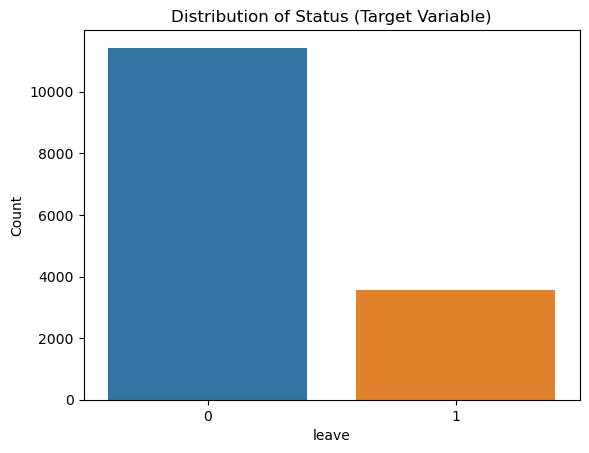

In [8]:
sns.countplot(data=data, x='left')
plt.title('Distribution of Status (Target Variable)')
plt.xlabel('leave')
plt.ylabel('Count')
plt.show()

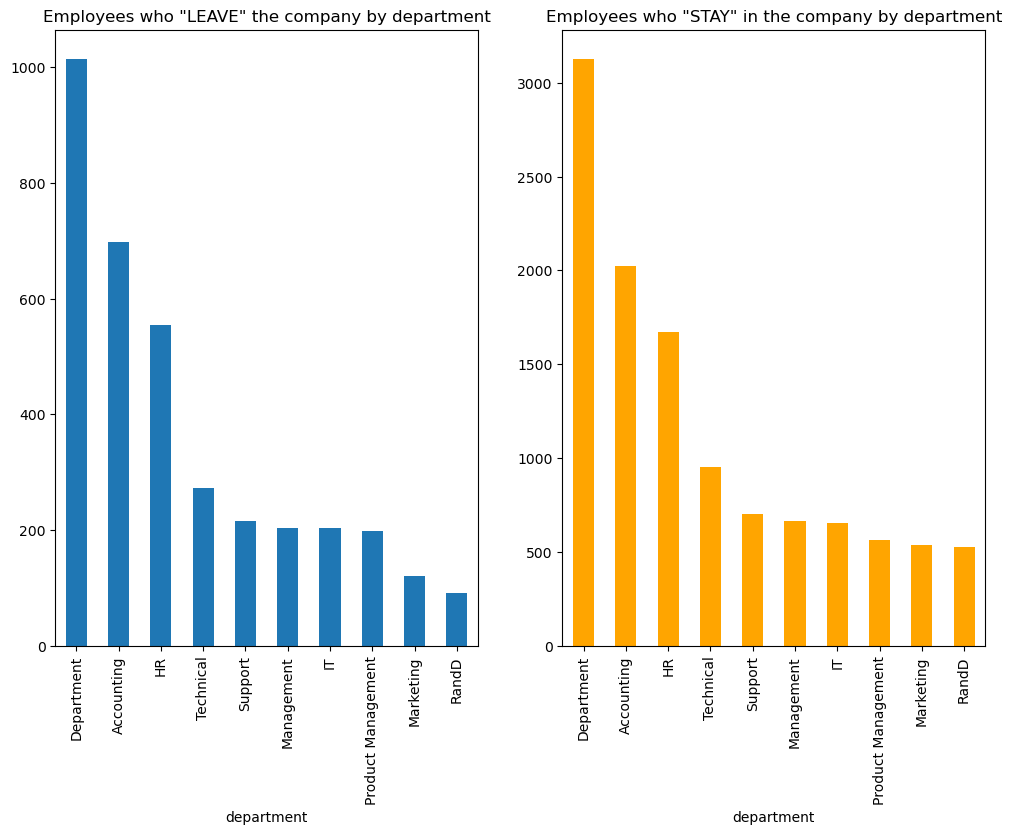

In [9]:
# Check the employees Status they leave or stay in company
leave = data[(data['left'] == 1)]
stay = data[(data['left']==0)]
dept_name = data['department'].unique()
name=['Department','Accounting','HR','Technical','Support','Management','IT','Product Management','Marketing','RandD']
index = range(10)

plt.figure(1,figsize=(12,8))

# for the leave employees
plt.subplot(1,2,1)
leave['department'].value_counts().plot(kind='bar')
plt.title('Employees who "LEAVE" the company by department')
plt.xticks(index,name)

# for stay employees
plt.subplot(1,2,2)
stay['department'].value_counts().plot(kind='bar',color='orange')
plt.title('Employees who "STAY" in the company by department')
plt.xticks(index,name)
plt.show()

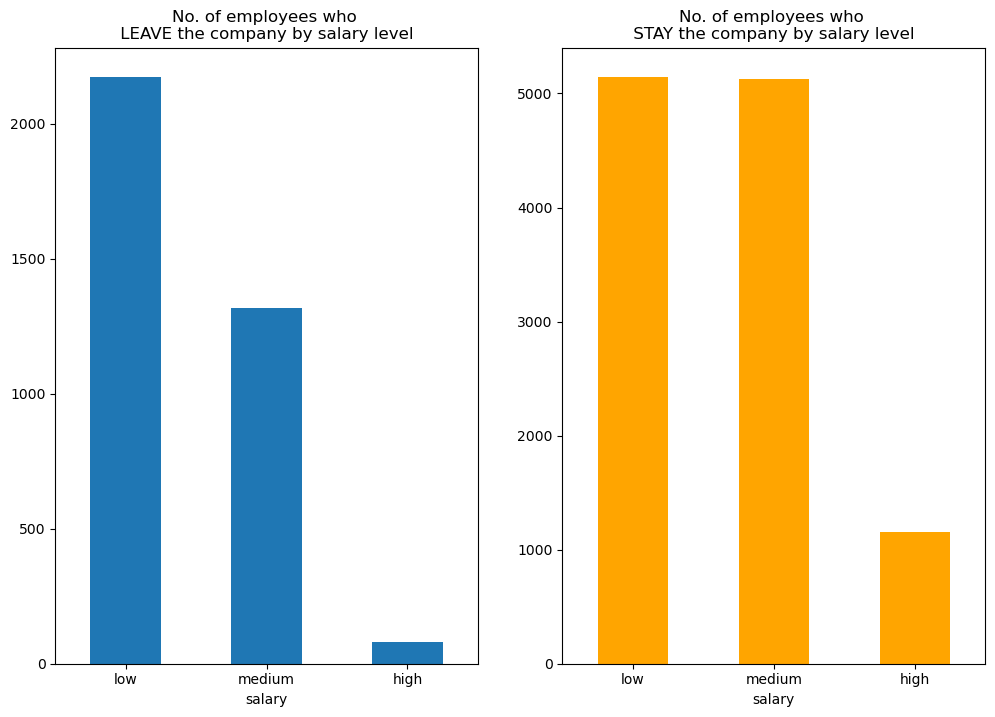

In [10]:
# Check no. of employees whow leave or stay by salary level
Leave_salary_level_count = leave['salary'].value_counts()
Stay_salary_level_count = stay['salary'].value_counts()

# for leave employees
plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
Leave_salary_level_count.plot(kind='bar',rot=0)
plt.title('No. of employees who \n LEAVE the company by salary level ')

# for stay employees
plt.subplot(1,2,2)
Stay_salary_level_count.plot(kind='bar',rot=0,color='orange')
plt.title('No. of employees who \n STAY the company by salary level ')
plt.show()

In [11]:
# Check the no. of employees leave or stay by department
def bar_plot_dept_leave_salary(department):
    dept_leave = leave[leave['department'] ==department]
    count = dept_leave['salary'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,width=0.5, color='orange')
    plt.xticks(index,['Low','Medium','High'])
    
def bar_plot_dept_stay_salary(department):
    dept_stay = stay[stay['department'] ==department]
    count = dept_stay['salary'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,width=0.5,color='green')
    plt.xticks(index,['Low','Medium','High'])

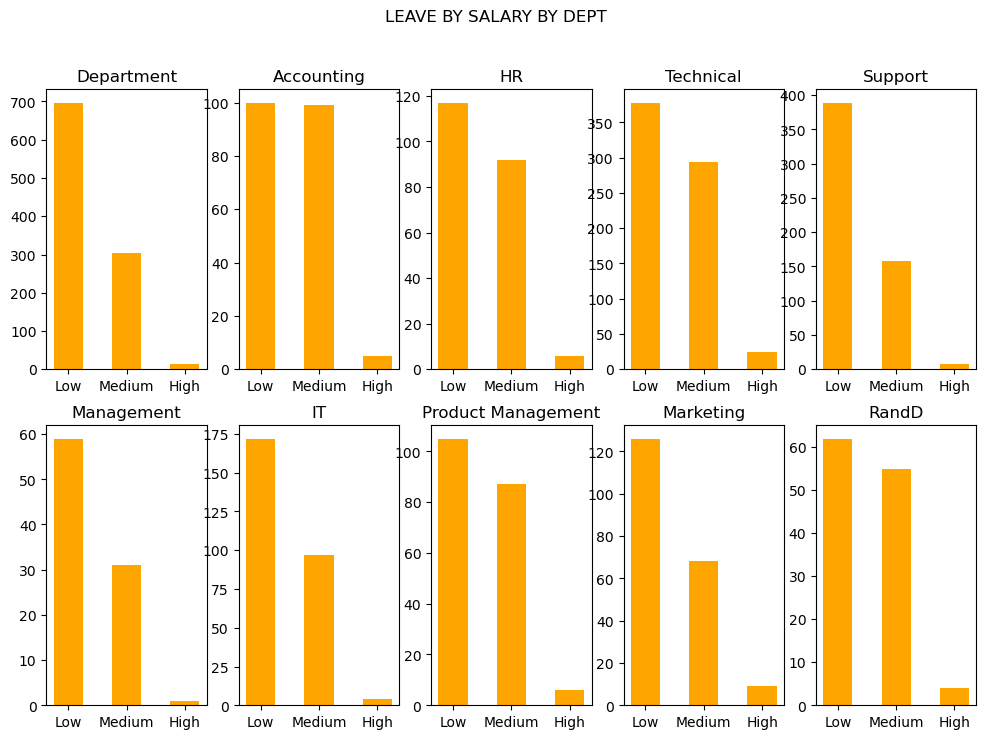

In [12]:
# for leave employees
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    bar_plot_dept_leave_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('LEAVE BY SALARY BY DEPT')
plt.show()

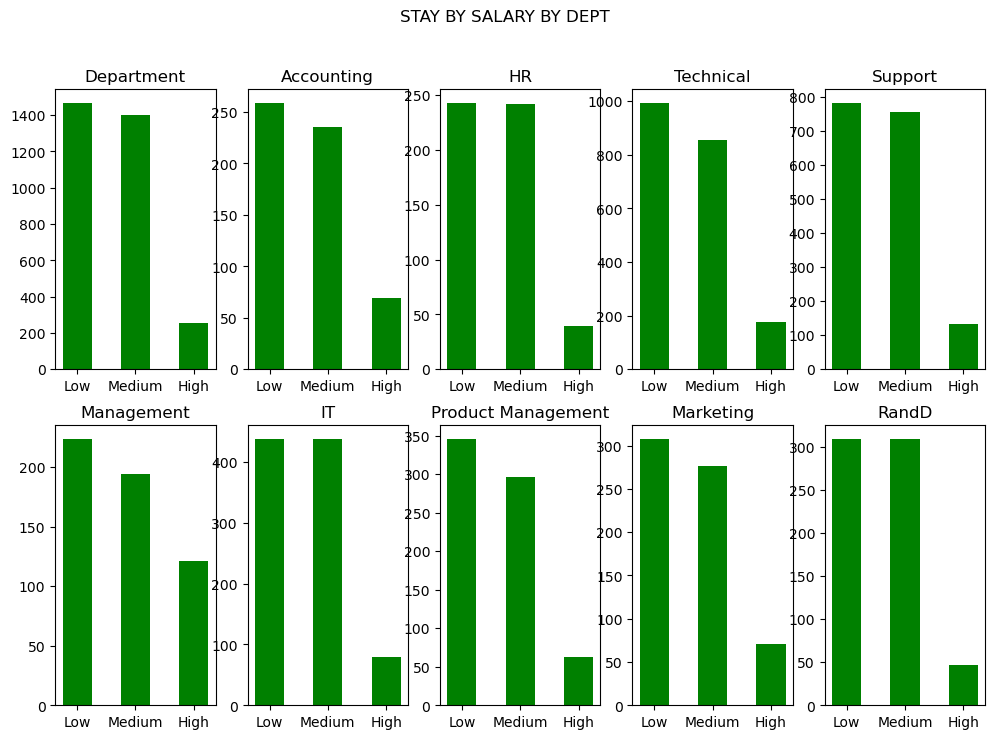

In [13]:
# for stay employees
plt.figure(1,figsize=(12,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    bar_plot_dept_stay_salary(dept_name[i])
    plt.title(name[i])
plt.suptitle('STAY BY SALARY BY DEPT')
plt.show()

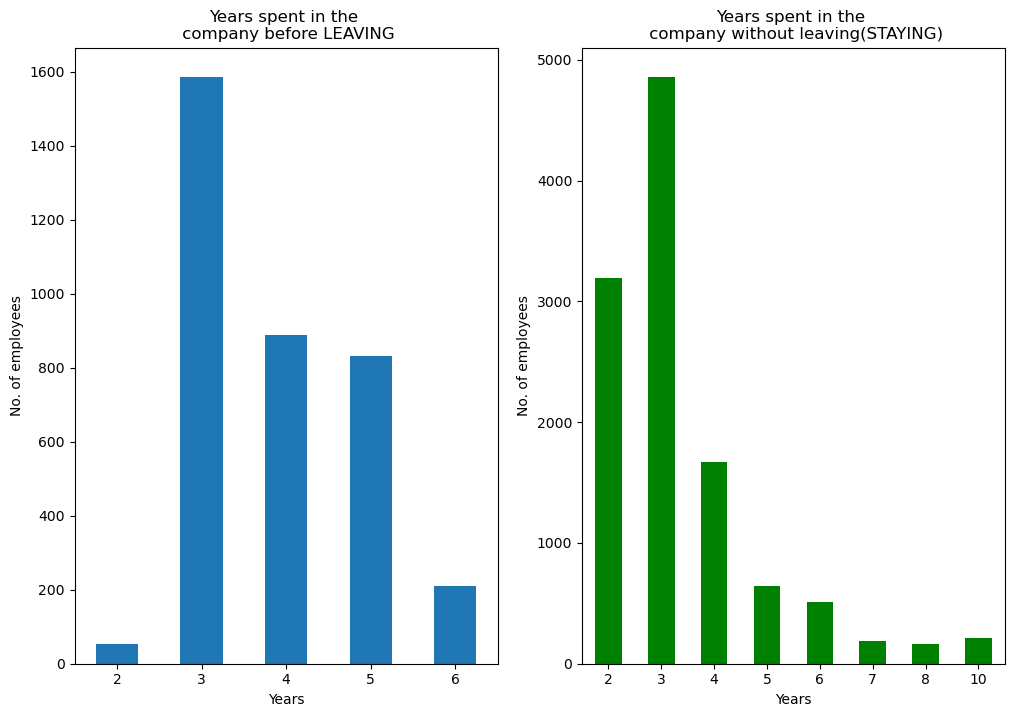

In [14]:
# Check the employees no. of years spent with company 
leave_time_spent_count = leave['time_spend_company'].value_counts().sort_index()
stay_time_spent_count = stay['time_spend_company'].value_counts().sort_index()

# for leave employees
plt.figure(1,figsize=(12,8))
plt.subplot(1,2,1)
leave_time_spent_count.plot(kind='bar',rot=0)
plt.title('Years spent in the \n company before LEAVING')
plt.xlabel('Years')
plt.ylabel('No. of employees')

# for stay employees
plt.subplot(1,2,2)
stay_time_spent_count.plot(kind='bar',rot=0,color='green')
plt.title('Years spent in the \n company without leaving(STAYING)')
plt.xlabel('Years')
plt.ylabel('No. of employees')
plt.show()



In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['left'])
y = data.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [16]:
print("Ratio of workers who left in train:", y_train.sum()/y_train.count())
print("Ratio of workers who left in test:", y_test.sum()/y_test.count())

Ratio of workers who left in train: 0.23812381238123811
Ratio of workers who left in test: 0.238


In [17]:
print("Accuracy:", 1-y_test.sum()/y_test.size)

Accuracy: 0.762


<Axes: xlabel='salary', ylabel='left'>

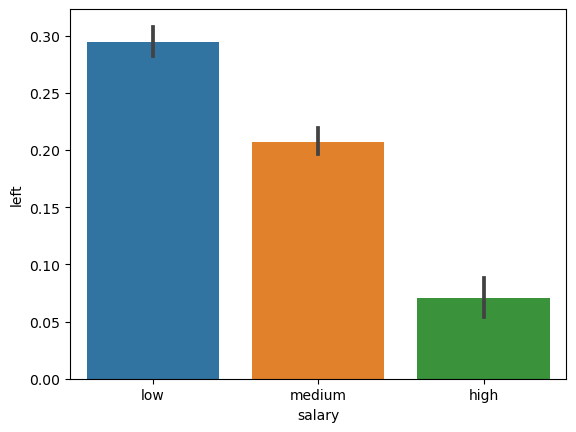

In [18]:
sns.barplot(x=X_train.salary, y=y_train, order=['low', 'medium', 'high'])

# Model Buliding

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
del data['department']
del data['salary']
del data['Current_Status']

In [21]:
# Split data into training and testing data in "data and label"
label = data.pop('left')
data_train,data_test,label_train,label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [22]:
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

def run_classifiers(data_train,label_train,data_test,label_test):
    Training_score = []
    Testing_score = []
    Model = []
    Accuracy = []
    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        classifier.fit(data_train,label_train)
        Trs = classifier.score(data_train,label_train)
        Training_score.append(Trs)
        Tes = classifier.score(data_test,label_test)
        Testing_score.append(Tes)
    
        print (""+Model[i]+" training score : "+ \
        Training_score[i]+" and testing score : "+Testing_score[i])

In [23]:
Training_score = []
Testing_score = []
Model = []
def run_classifiers(data_train,label_train,data_test,label_test):
    Training_score = []
    Testing_score = []
    Model = []
    Accuracy = []
    for classifier in Classifiers:
        Model.append(classifier.__class__.__name__)
        classifier.fit(data_train,label_train)
        Training_score.append(classifier.score(data_train,label_train))
        Testing_score.append(classifier.score(data_test,label_test))
    for i in range(7):
        print ("\n"+str(Model[i])+":\n training score: "+str(Training_score[i])+
               "\n testing score: "+ str(Testing_score[i]))

In [24]:
run_classifiers(data_train,label_train,data_test,label_test)


LogisticRegression:
 training score: 0.7681473456121344
 testing score: 0.7563333333333333

KNeighborsClassifier:
 training score: 0.9644137011417618
 testing score: 0.9443333333333334

SVC:
 training score: 0.7852321026752229
 testing score: 0.7843333333333333

DecisionTreeClassifier:
 training score: 0.9998333194432869
 testing score: 0.9773333333333334

RandomForestClassifier:
 training score: 0.9998333194432869
 testing score: 0.989

AdaBoostClassifier:
 training score: 0.9597466455537962
 testing score: 0.9573333333333334

GaussianNB:
 training score: 0.7943995332944412
 testing score: 0.7953333333333333


# Feature Engineering

In [25]:
from sklearn.metrics import recall_score,precision_score, f1_score, classification_report

# Random Forest Classification
rf = RandomForestClassifier()
rf.fit(data_train, label_train)

pred = rf.predict(data_test)
test = label_test

print(f'Best Model: {rf.__class__.__name__}')
print("Best Score: ", precision_score(pred, test))
print("F1 score: ", f1_score(pred, test))
print ("\nclassification_report:\n", classification_report(pred, test))

Best Model: RandomForestClassifier
Best Score:  0.9631728045325779
F1 score:  0.9756097560975608

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2312
           1       0.96      0.99      0.98       688

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(data_train, label_train)

pred = lr.predict(data_test)
test = label_test

print(f'Best Model: {lr.__class__.__name__}')
print("Best Score: ", precision_score(pred, test))
print("F1 score: ", f1_score(pred, test))
print ("\nclassification_report:\n", classification_report(pred, test))

Best Model: LogisticRegression
Best Score:  0.22804532577903683
F1 score:  0.3057929724596391

classification_report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2653
           1       0.23      0.46      0.31       347

    accuracy                           0.76      3000
   macro avg       0.57      0.63      0.58      3000
weighted avg       0.84      0.76      0.79      3000



In [27]:
# Decision Tree Classification
dt = DecisionTreeClassifier()
dt.fit(data_train, label_train)

pred = dt.predict(data_test)
test = label_test

print(f'Best Model: {dt.__class__.__name__}')
print("Best Score: ", precision_score(pred, test))
print("F1 score: ", f1_score(pred, test))
print ("\nclassification_report:\n", classification_report(pred, test))

Best Model: DecisionTreeClassifier
Best Score:  0.9674220963172805
F1 score:  0.95324494068388

classification_report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2273
           1       0.97      0.94      0.95       727

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [28]:
# Support Vector Machine
sv = SVC()
sv.fit(data_train, label_train)

pred = sv.predict(data_test)
test = label_test

print(f'Best Model: {sv.__class__.__name__}')
print("Best Score: ", precision_score(pred, test))
print("F1 score: ", f1_score(pred, test))
print ("\nclassification_report:\n", classification_report(pred, test))

Best Model: SVC
Best Score:  0.08498583569405099
F1 score:  0.15645371577574968

classification_report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      2939
           1       0.08      0.98      0.16        61

    accuracy                           0.78      3000
   macro avg       0.54      0.88      0.52      3000
weighted avg       0.98      0.78      0.86      3000



In [29]:
# KNN Classification
kn = KNeighborsClassifier()
kn.fit(data_train, label_train)

pred = kn.predict(data_test)
test = label_test

print(f'Best Model: {kn.__class__.__name__}')
print("Best Score: ", precision_score(pred, test))
print("F1 score: ", f1_score(pred, test))
print ("\nclassification_report:\n", classification_report(pred, test))

Best Model: KNeighborsClassifier
Best Score:  0.9121813031161473
F1 score:  0.8852233676975946

classification_report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2251
           1       0.91      0.86      0.89       749

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [30]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import random

In [31]:
from sklearn.preprocessing import PolynomialFeatures

#The preprocessor will rescale columns and add polynomial features
preprocessor = ColumnTransformer(
    transformers=[
        ("poly", PolynomialFeatures(8), ['satisfaction_level', 'last_evaluation','average_montly_hours'] ),
        ("poly2", PolynomialFeatures(2), ['number_project','time_spend_company']),
        ('scaler', StandardScaler(), data_train.columns)
    ]
)


model = Pipeline(
    steps=[("preprocessor", preprocessor), 
            ("model", RidgeClassifierCV(alphas=[ random.uniform(0.1,1)* 10**x for x in range(-3,2) for _ in range(10)], cv=5))
           ]
)

In [32]:
model.fit(data_train,y=label_train)
model['model'].best_score_

0.9434119077393358

In [33]:
print('Accuracy on test data:', model.score(data_test,label_test))

Accuracy on test data: 0.9486666666666667


In [34]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV


#The model consists of the scaler and XGBClassifier
clf = Pipeline(
    steps=[('scaler', StandardScaler()),
            ("xgb", XGBClassifier(cv=5))
           ]
)


#To tune the parameters, experiment with different combinations of values here.
#They are currently set to the values that give best validation score that we could find.
param_grid = {
    "xgb__n_estimators": [300],
    "xgb__learning_rate": [0.3],
    "xgb__eta":[0.1],
    "xgb__max_depth": [1],
    "xgb__objective":['reg:squarederror'],
    'xgb__min_child_weight': [4],
    'xgb__subsample': [0.7],
    'xgb__reg_lambda':[0.55]
}

search = GridSearchCV(clf, param_grid=param_grid, cv = 5, scoring='accuracy',n_jobs=-1)


#Fit the model and print the parameters of the best model found in the Grid search.
search.fit(data_train,label_train)
print(search.best_params_)

{'xgb__eta': 0.1, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 1, 'xgb__min_child_weight': 4, 'xgb__n_estimators': 300, 'xgb__objective': 'reg:squarederror', 'xgb__reg_lambda': 0.55, 'xgb__subsample': 0.7}


In [35]:
#Best validation score
search.best_score_

0.9490793038766153

In [36]:
search.score(data_test,label_test)

0.9496666666666667

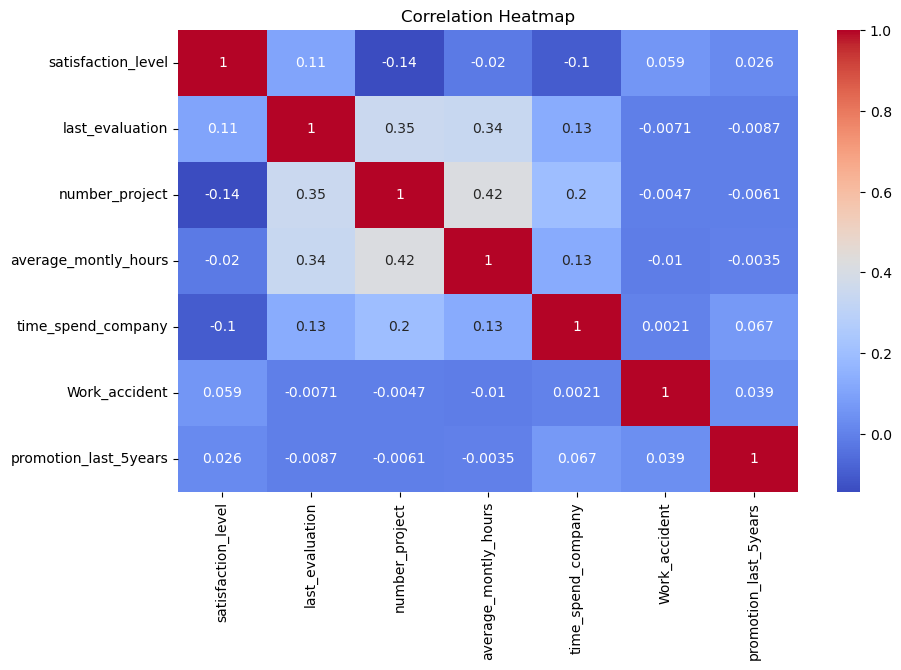

In [37]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()